In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [7]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [8]:
X2[:5, :]

array([[ 1.        , -0.44361729,  0.1967963 ],
       [ 1.        , -2.55283829,  6.51698333],
       [ 1.        ,  0.32744585,  0.10722079],
       [ 1.        ,  1.67033327,  2.79001324],
       [ 1.        , -2.70774246,  7.33186921]])

In [9]:
X[:5,:]

array([[-0.44361729],
       [-2.55283829],
       [ 0.32744585],
       [ 1.67033327],
       [-2.70774246]])

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

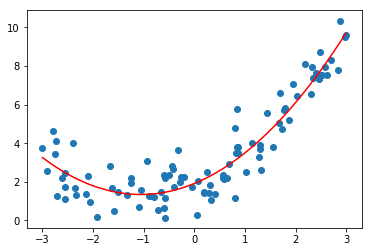

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [13]:
lin_reg2.coef_

array([0.        , 1.07771491, 0.50983805])

In [14]:
lin_reg2.intercept_

1.9109287177298666

### 关于PolynomialFeatures

In [17]:
X = np.arange(1,11).reshape(-1,2)

In [18]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [20]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(5, 6)

In [21]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### Pipeline

##### 多项式特征 数据归一化 线性回归

In [22]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,100)

In [25]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_req", LinearRegression())
])

In [28]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

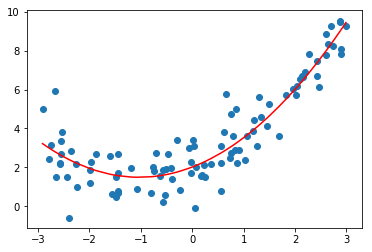

In [30]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()